In [1]:
import pandas as pd
import numpy as np
import os
from os import path
import shutil
import psycopg2

import time

import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sqlite3

In [2]:
df = pd.read_csv('/Users/cp/Documents/dsi/8a_kaggle/dev_imac2/df_sqlite_full2_47_added.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (10,21,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<AxesSubplot:>

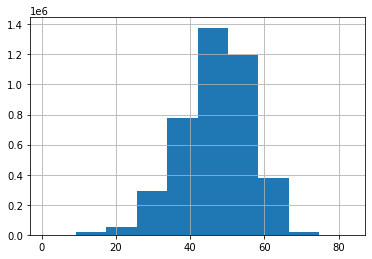

In [3]:
df.grade_id.hist()

In [4]:
# db_conn = sqlite3.connect('database3.sqlite')
# theCursor = db_conn.cursor()
# query = theCursor.execute('select * from ascent;') 
# cols = [column[0] for column in query.description]
# df_ascent= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

# df_ascent.to_csv('/Users/cp/Documents/dsi/8a_kaggle/dev_imac2/df_ascent.csv', index = False)
df_ascent= pd.read_csv('/Users/cp/Documents/dsi/8a_kaggle/dev_imac2/df_ascent.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# df_grade= pd.read_sql_query("SELECT * FROM grade", db_conn)


# df_grade.to_csv('/Users/cp/Documents/dsi/8a_kaggle/dev_imac2/df_grade.csv', index = False)
df_grade= pd.read_csv('/Users/cp/Documents/dsi/8a_kaggle/dev_imac2/df_grade.csv')

In [6]:
# df_user = pd.read_sql_query("SELECT * FROM user", db_conn)

# df_user.to_csv('/Users/cp/Documents/dsi/8a_kaggle/dev_imac2/df_user.csv', index = False)
df_user= pd.read_csv('/Users/cp/Documents/dsi/8a_kaggle/dev_imac2/df_user.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df_ascent.head()

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,country,comment,rating,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
0,2,1,36.0,NaN,0,3,0,545,918342000,1999.0,...,THA,Thailand\n,0.0,NaN,255.0,0.0,0.0,0.0,0.0,0.0
1,3,1,36.0,NaN,0,3,0,545,925509600,1999.0,...,NaN,\n,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1,36.0,NaN,0,3,0,545,933026400,1999.0,...,SWE,\n,0.0,NaN,255.0,0.0,0.0,0.0,0.0,0.0
3,5,1,36.0,NaN,0,3,0,545,933026400,1999.0,...,SWE,\n,0.0,NaN,255.0,0.0,0.0,0.0,0.0,0.0
4,6,1,36.0,NaN,0,3,0,545,933458400,1999.0,...,NaN,\n,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.head()

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped,shoe,video,screename
0,420663,11629.0,29.0,Second Go,2.0,1.0,1.0,0.0,1.139267e+09,2006.0,...,NaN,0.0,False,False,False,False,False,NaN,NaN,NaN
1,420664,11629.0,31.0,NaN,0.0,1.0,1.0,0.0,1.139267e+09,2006.0,...,NaN,255.0,False,False,False,False,False,NaN,NaN,NaN
2,420665,11629.0,29.0,Second Go,2.0,1.0,1.0,0.0,1.139267e+09,2006.0,...,NaN,0.0,False,False,False,False,False,NaN,NaN,NaN
3,420666,11275.0,44.0,NaN,0.0,1.0,1.0,600.0,1.136070e+09,2006.0,...,NaN,0.0,False,False,False,False,False,NaN,NaN,NaN
4,420667,11275.0,40.0,NaN,0.0,1.0,1.0,500.0,1.136070e+09,2006.0,...,NaN,255.0,False,False,False,False,False,NaN,NaN,NaN


In [9]:
def standardize_usa_boulder_ratings(row):
    """Group and standardize V-scale ratings"""
    rating = row.usa_boulders
    if rating == 'VB':
        rating = 'V0-'
    elif rating == 'V3/4':
        rating = 'V3'
    elif rating == 'V4/V5':
        rating = 'V4'
    elif rating == 'V5/V6':
        rating = 'V5'
    elif rating == 'V8/9':
        rating = 'V8'
    row.usa_boulders = rating
    
    return row


# Pre-process raw data
df_grade_processed = (
    df_grade
    .loc[df_grade.usa_boulders != '', :] # filter for climbs with V-scale ratings 
    .apply(standardize_usa_boulder_ratings, axis=1)  # group and standardize V-scale ratings
)
df_ascent_processed = df.loc[df.climb_type == 1, :] # filter for bouldering climbs
# df_ascent_processed = df_ascent.loc[df_ascent.climb_type == 1, :] # filter for bouldering climbs

In [10]:
df_interim = (
    df_ascent_processed
    .merge(df_grade_processed, how='inner', left_on='grade_id', right_on='id', suffixes=('_ascent', '_grade'))
    .loc[:, ['id_ascent', 'id_grade', 'user_id', 'date', 'year', 'usa_boulders', 'name']]  # select relevant columns for project
    .sort_values(by=['user_id', 'date'])
    .reset_index(drop=True)   
)

display(df_interim.head())

,id_ascent,id_grade,user_id,date,year,usa_boulders,name
0,37265,44,1.0,1.010099e+09,2002.0,V5,???
1,37266,44,1.0,1.010099e+09,2002.0,V5,???
2,50179,31,1.0,1.010704e+09,2002.0,V1,Classico droga
3,47943,21,1.0,1.010704e+09,2002.0,V0,highball
4,50176,21,1.0,1.010704e+09,2002.0,V0,I'm chevy chase...


In [11]:
df_interim.usa_boulders.value_counts()

V6     206947
V8     187257
V5     166368
V4     133633
V7     131650
V3     115562
V9      81199
V10     47316
V1      45757
V2      35000
V11     33007
V0      15015
V12     12314
V0-      7668
V13      5127
V14      1219
V15       229
V16        18
V17         1
Name: usa_boulders, dtype: int64

In [12]:
df_interim_pivot = (
    df_interim
    .groupby(['user_id', 'usa_boulders'])
    .nth(0, dropna=None)  # select first ascent at each level for each climber
    .reset_index()
    .pivot_table(index='user_id', columns='usa_boulders', values='date')
#     .loc[:, ['V0-', 'V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'v11', 'v12', 'v13', 'v14', 'v15']]  # limit analysis to V0- to V10 problems
    .reindex(columns=['V0-', 'V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15'])
    .reset_index()
)

display(df_interim_pivot.head())

usa_boulders,user_id,V0-,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,1.0,1.019426e+09,1.010704e+09,1.010704e+09,1.019340e+09,1.017529e+09,1.018908e+09,1.010099e+09,1.024265e+09,1.022364e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,9.466812e+08,NaN,9.939384e+08,9.920376e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.229176e+08,9.783036e+08,9.229176e+08,988668000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,1.155679e+09,1.155679e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,1.428790e+09,1.025820e+09,1.112825e+09,1.003356e+09,8.256348e+08,8.571708e+08,9.470268e+08,9.865080e+08,920242800.0,1.141513e+09,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_clean = (
    df_interim_pivot
    .drop('user_id', axis=1)
)

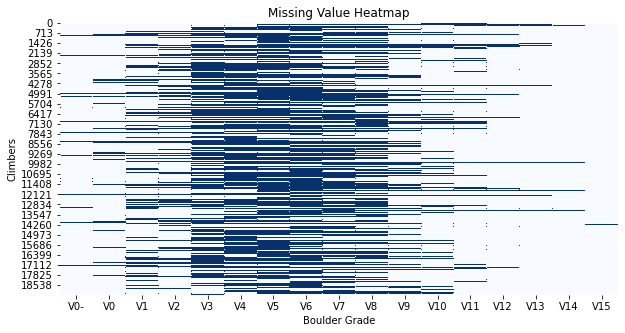

Blue indicates available data
Number of Climbs: 97076
Number Climbers: 19225


In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_clean.notnull().applymap(lambda x: int(x)), cbar=False, cmap='Blues')
plt.title("Missing Value Heatmap")
plt.xlabel("Boulder Grade")
plt.ylabel("Climbers")
plt.show()

print("Blue indicates available data")
print("Number of Climbs: {}".format(df_clean.notnull().sum().sum()))
print("Number Climbers: {}".format(len(df_clean)))

In [15]:
df_clean_diff = (
    df_clean
    .diff(axis=1)
    .applymap(lambda x: np.nan if x < 0 else x)  # remove negative time intervals
    .applymap(lambda x: x / (3600*24*30))  # convert timestamps to months
    .drop('V0-', axis=1)
    .rename(index=str, columns={
        "V0": "V0-", "V1": "V0", "V2": "V1",
        "V3": "V2", "V4": "V3", "V5": "V4",
        "V6": "V5", "V7": "V6","V8": "V7",
        "V9": "V8", "V10": "V9","V11": "V10","V12": "V11","V13": "V12","V14": "V13","V15": "V14"
    })  # shift column labels down a grade to account for diff command
)

# Remove outliers
thresh = df_clean_diff.quantile(q=0.99, axis='index')
mask = df_clean_diff.apply(lambda row: row < thresh.values, axis=1)
df_clean_diff_thresh = df_clean_diff[mask]

display(df_clean_diff_thresh.head())

usa_boulders,V0-,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,NaN,0.0,3.331944,NaN,0.531944,NaN,5.465278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,21.368056,NaN,25.366667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,33.566667,NaN,NaN,12.166667,34.666667,15.231944,NaN,85.366667,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
vals = (
    df_clean_diff_thresh
#     .rename(index=str, columns={'V0-': '-V0'}) # rename column for plotting purposes
    .rename(index=str, columns={'V0-': 'VB'}) # rename column for plotting purposes
    .mean()
    .cumsum()
)
errs = (
    df_clean_diff_thresh
    .std()
)

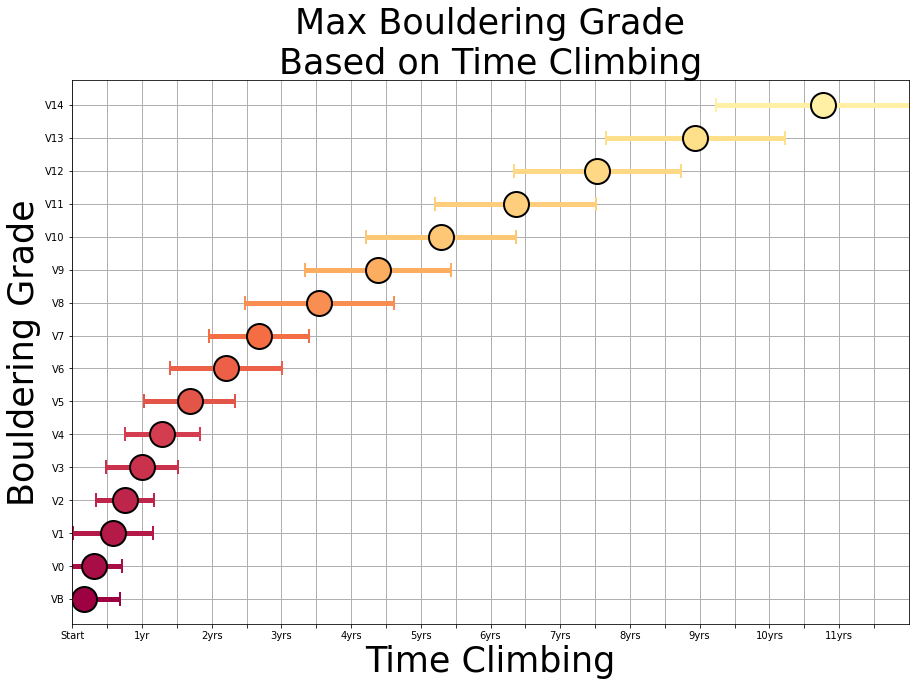

Plot Values:


usa_boulders
VB       2.797197
V0       5.089536
V1       9.399849
V2      12.105841
V3      16.024863
V4      20.704741
V5      26.955340
V6      35.231038
V7      42.915448
V8      56.706814
V9      70.190725
V10     84.551902
V11    101.784406
V12    120.524257
V13    143.022322
V14    172.354673
dtype: float64

In [17]:
cmap = cm.Spectral
colors = []
colors.extend(cmap(np.linspace(0, 0.1, 6)))
colors.extend(cmap(np.linspace(0.15, 0.2, 3)))
colors.extend(cmap(np.linspace(0.25, 0.3, 2)))
colors.extend(cmap(np.linspace(0.35, 0.4, 4)))
colors.extend(cmap(np.linspace(0.45, 0.5, 1)))

# Create figure
plt.figure(figsize=(15, 10))
ax = plt.gca()

# Creat  Plot
ax.set_facecolor('white')
for i, c in enumerate(colors):    
    plt.errorbar(
        vals[i], 
        i, 
        xerr=errs[i], 
        color=c,
        fmt='o', 
        markersize=25,
        markeredgecolor='black',
        markeredgewidth=2.0,
        linewidth=5,
        ecolor=c,
        capsize=7
    )

# Alter y-axis
plt.yticks(
    np.arange(16),
    vals.index
)
    
# Alter x-axis
plt.xticks(
    np.arange(0, 192, 8),
    ['Start', '', '1yr', '', '2yrs', '', '3yrs', '', '4yrs', '', '5yrs', '', '6yrs', '', '7yrs', '', '8yrs', '', '9yrs', '', '10yrs', '', '11yrs', '' ])
plt.xlim((-0.1, 192))

# Grid
plt.grid(True, axis='y', which='both', linestyle='-', linewidth=1)
plt.grid(True, axis='x', which='both', linestyle='-', linewidth=1)

# Titles
plt.title("Max Bouldering Grade\nBased on Time Climbing", fontsize=35)
plt.ylabel("Bouldering Grade", fontsize=35)
plt.xlabel("Time Climbing", fontsize=35)

# Font size
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.savefig('boulder_routes_time.png', dpi = 200)

plt.show()

print("Plot Values:")
display(vals)

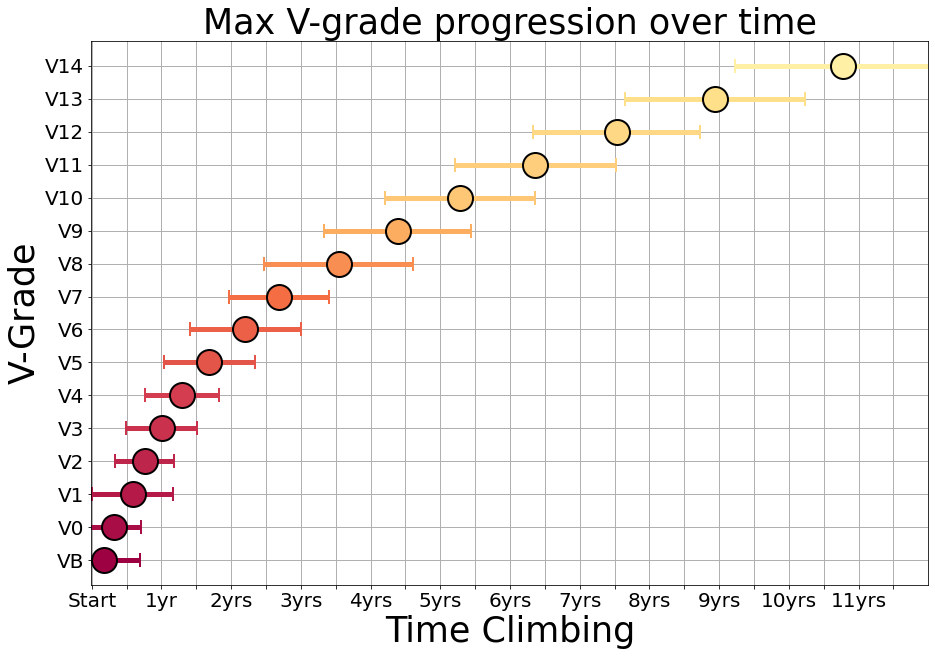

Plot Values:


usa_boulders
VB       2.797197
V0       5.089536
V1       9.399849
V2      12.105841
V3      16.024863
V4      20.704741
V5      26.955340
V6      35.231038
V7      42.915448
V8      56.706814
V9      70.190725
V10     84.551902
V11    101.784406
V12    120.524257
V13    143.022322
V14    172.354673
dtype: float64

In [18]:
cmap = cm.Spectral
colors = []
colors.extend(cmap(np.linspace(0, 0.1, 6)))
colors.extend(cmap(np.linspace(0.15, 0.2, 3)))
colors.extend(cmap(np.linspace(0.25, 0.3, 2)))
colors.extend(cmap(np.linspace(0.35, 0.4, 4)))
colors.extend(cmap(np.linspace(0.45, 0.5, 1)))

# Create figure
plt.figure(figsize=(15, 10))
ax = plt.gca()

# Creat  Plot
ax.set_facecolor('white')
for i, c in enumerate(colors):    
    plt.errorbar(
        vals[i], 
        i, 
        xerr=errs[i], 
        color=c,
        fmt='o', 
        markersize=25,
        markeredgecolor='black',
        markeredgewidth=2.0,
        linewidth=5,
        ecolor=c,
        capsize=7
    )

# Alter y-axis
plt.yticks(
    np.arange(16),
    vals.index
)
    
# Alter x-axis
plt.xticks(
    np.arange(0, 192, 8),
    ['Start', '', '1yr', '', '2yrs', '', '3yrs', '', '4yrs', '', '5yrs', '', '6yrs', '', '7yrs', '', '8yrs', '', '9yrs', '', '10yrs', '', '11yrs', '' ])
plt.xlim((-0.1, 192))

# Grid
plt.grid(True, axis='y', which='both', linestyle='-', linewidth=1)
plt.grid(True, axis='x', which='both', linestyle='-', linewidth=1)

# Titles
plt.title("Max V-grade progression over time", fontsize=35)
plt.ylabel("V-Grade", fontsize=35)
plt.xlabel("Time Climbing", fontsize=35)

# Font size
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.savefig('boulder_routes_time.png', dpi = 200)

plt.show()

print("Plot Values:")
display(vals)

In [19]:
def standardize_usa_route_ratings(row):
    """Group and standardize yosemite ratings"""
    rating = row.usa_routes
    if rating == '5.15b/c':
        rating = '5.15b'
    elif rating == '3/4':
        rating = '5.3'
    elif rating == '5.14b/c':
        rating = '5.14b'
    elif rating == '5.14c/d':
        rating = '5.14c'
    elif rating == '5.14d/.15a':
        rating = '5.14d'
    elif rating == '5.15a/b':
        rating = '5.15a'
    row.usa_routes = rating
    
    return row


# Pre-process raw data
df_route_grade_processed = (
    df_grade
    .loc[df_grade.usa_routes != '', :] # filter for climbs with V-scale ratings 
    .apply(standardize_usa_route_ratings, axis=1)  # group and standardize V-scale ratings
)
df_route_ascent_processed = df.loc[df.climb_type == 0, :] # filter for bouldering climbs

In [20]:
df_interim_routes = (
    df_route_ascent_processed
    .merge(df_route_grade_processed, how='inner', left_on='grade_id', right_on='id', suffixes=('_ascent', '_grade'))
    .loc[:, ['id_ascent', 'id_grade', 'user_id', 'date', 'year', 'usa_routes', 'name']]  # select relevant columns for project
    .sort_values(by=['user_id', 'date'])
    .reset_index(drop=True)   
)

display(df_interim_routes.head())

,id_ascent,id_grade,user_id,date,year,usa_routes,name
0,18,40,1.0,913503600.0,1998.0,5.10c,Be Careful
1,19,40,1.0,913935600.0,1998.0,5.10c,Monkey Love
2,7,38,1.0,914022000.0,1998.0,5.10b,Valentine
3,35,42,1.0,914022000.0,1998.0,5.10d,Alone
4,20,40,1.0,914022000.0,1998.0,5.10c,Short & Savage


In [21]:
df_interim_routes.usa_routes.value_counts()

5.11d    263985
5.12a    253342
5.12b    226889
5.11c    214726
5.10c    209838
5.10a    190880
5.10d    181726
5.12c    172840
5.10b    171278
5.11a    170717
5.12d    143009
5.11b    119995
5.13b    107497
5.9      104612
5.13a    100498
5.8       61085
5.13c     45959
5.7       42430
5.4       29827
5.13d     25502
5.14a     11414
5.3        8683
5.14b      5796
5.6        5664
5.5        4043
5.14c      2017
5.14d       708
5.1         553
5.15a       125
5.15b        27
5.15c         7
Name: usa_routes, dtype: int64

In [22]:
df_interim_pivot2 = (
    df_interim_routes
    .groupby(['user_id', 'usa_routes'])
    .nth(0, dropna=None)  # select first ascent at each level for each climber
    .reset_index()
    .pivot_table(index='user_id', columns='usa_routes', values='date')
#     .loc[:, ['V0-', 'V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'v11', 'v12', 'v13', 'v14', 'v15']]  # limit analysis to V0- to V10 problems
    .reindex(columns=['5.1', '5.3', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10a', '5.10b', '5.10c', '5.10d', '5.11a', '5.11b', '5.11c', '5.11d', '5.12a', '5.12b', '5.12c', '5.12d', '5.12a', '5.13a', '5.13b', '5.13c', '5.13d','5.14a', '5.14b', '5.14c', '5.14d', '5.15a', '5.15b', '5.15c'])
    .reset_index()
)

display(df_interim_pivot2.head())

usa_routes,user_id,5.1,5.3,5.5,5.6,5.7,5.8,5.9,5.10a,5.10b,...,5.13b,5.13c,5.13d,5.14a,5.14b,5.14c,5.14d,5.15a,5.15b,5.15c
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.183420e+08,9.140220e+08,...,9.890136e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.334584e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.166569e+09,1.155766e+09,...,1.088633e+09,1.227913e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.0,1.400796e+09,1.303337e+09,1.396134e+09,1.396649e+09,1.376345e+09,1.303337e+09,1.377727e+09,1.059689e+09,1.178402e+09,...,8.836092e+08,9.571320e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_clean2 = (
    df_interim_pivot2
    .drop('user_id', axis=1)
)

In [24]:
df_clean2.head()

usa_routes,5.1,5.3,5.5,5.6,5.7,5.8,5.9,5.10a,5.10b,5.10c,...,5.13b,5.13c,5.13d,5.14a,5.14b,5.14c,5.14d,5.15a,5.15b,5.15c
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.183420e+08,9.140220e+08,913503600.0,...,9.890136e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,991346400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.334584e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.166569e+09,1.155766e+09,NaN,...,1.088633e+09,1.227913e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.400796e+09,1.303337e+09,1.396134e+09,1.396649e+09,1.376345e+09,1.303337e+09,1.377727e+09,1.059689e+09,1.178402e+09,836172000.0,...,8.836092e+08,9.571320e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


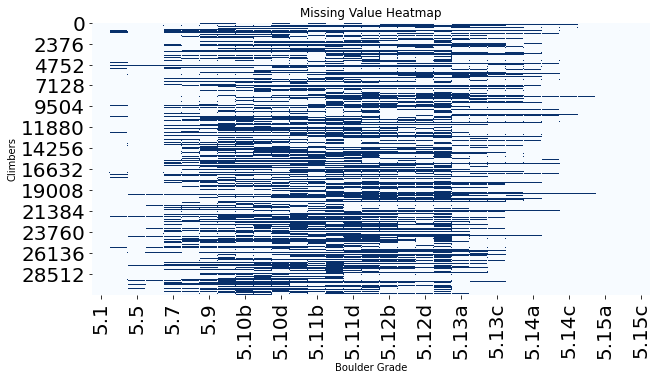

Blue indicates available data
Number of Climbs: 97076
Number Climbers: 19225


In [25]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_clean2.notnull().applymap(lambda x: int(x)), cbar=False, cmap='Blues')
plt.title("Missing Value Heatmap")
plt.xlabel("Boulder Grade")
plt.ylabel("Climbers")
plt.show()

print("Blue indicates available data")
print("Number of Climbs: {}".format(df_clean.notnull().sum().sum()))
print("Number Climbers: {}".format(len(df_clean)))

In [26]:
df_clean2.head()

usa_routes,5.1,5.3,5.5,5.6,5.7,5.8,5.9,5.10a,5.10b,5.10c,...,5.13b,5.13c,5.13d,5.14a,5.14b,5.14c,5.14d,5.15a,5.15b,5.15c
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.183420e+08,9.140220e+08,913503600.0,...,9.890136e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,991346400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.334584e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.166569e+09,1.155766e+09,NaN,...,1.088633e+09,1.227913e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.400796e+09,1.303337e+09,1.396134e+09,1.396649e+09,1.376345e+09,1.303337e+09,1.377727e+09,1.059689e+09,1.178402e+09,836172000.0,...,8.836092e+08,9.571320e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_clean2.columns

Index(['5.1', '5.3', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10a', '5.10b',
       '5.10c', '5.10d', '5.11a', '5.11b', '5.11c', '5.11d', '5.12a', '5.12b',
       '5.12c', '5.12d', '5.12a', '5.13a', '5.13b', '5.13c', '5.13d', '5.14a',
       '5.14b', '5.14c', '5.14d', '5.15a', '5.15b', '5.15c'],
      dtype='object', name='usa_routes')

In [28]:
df_clean_diff = (
    df_clean2
    .diff(axis=1)
    .applymap(lambda x: np.nan if x < 0 else x)  # remove negative time intervals
    .applymap(lambda x: x / (3600*24*30))  # convert timestamps to months
    .drop('5.1', axis=1)
    .rename(index=str, columns={
         "5.3": "5.2", "5.5": "5.4",
        "5.6": "5.5", "5.7": "5.6", "5.8": "5.7",
        "5.9": "5.8", "5.10a": "5.9","5.10b": "5.10a",
        "5.10c": "5.10b", "5.10d": "5.10c","5.11a": "5.10d","5.11b": "5.11a","5.11c": "5.11b","5.11d": "5.11c","5.12a": "5.11d",
        "5.12b": "5.12a", "5.12c": "5.12b","5.12d": "5.12c","5.13a": "5.12d",
        "5.13b": "5.13a", "5.13c": "5.13b","5.13d": "5.13c","5.14a":"5.13d", "5.14b":"5.14a",
        "5.14c": "5.14b", "5.14d": "5.14c","5.15a": "5.14d","5.15b": "5.15a",
        "5.15c": "5.15b", 
    })  # shift column labels down a grade to account for diff command
)

# Remove outliers
thresh = df_clean_diff.quantile(q=0.99, axis='index')
mask = df_clean_diff.apply(lambda row: row < thresh.values, axis=1)
df_clean_diff_thresh = df_clean_diff[mask]

display(df_clean_diff_thresh.head())

usa_routes,5.2,5.4,5.5,5.6,5.7,5.8,5.9,5.10a,5.10b,5.10c,...,5.13a,5.13b,5.13c,5.13d,5.14a,5.14b,5.14c,5.14d,5.15a,5.15b
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,53.734722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,35.801389,0.198611,NaN,NaN,28.7,NaN,45.8,NaN,NaN,...,12.166667,28.365278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
vals = (
    df_clean_diff_thresh
#     .rename(index=str, columns={'V0-': '-V0'}) # rename column for plotting purposes
#     .rename(index=str, columns={'V0': 'VB'}) # rename column for plotting purposes
    .mean()
    .cumsum()
)
errs = (
    df_clean_diff_thresh
    .std()
)

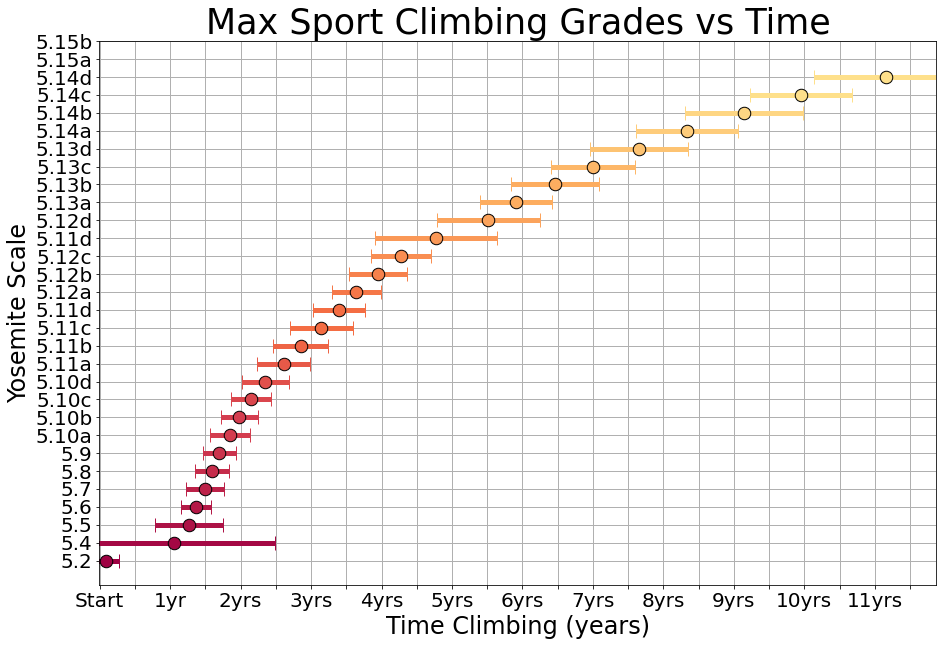

Plot Values:


usa_routes
5.2        2.964236
5.4       33.900296
5.5       40.571970
5.6       43.778567
5.7       47.789424
5.8       51.084302
5.9       54.396052
5.10a     59.055994
5.10b     63.409491
5.10c     68.699988
5.10d     75.190787
5.11a     83.516910
5.11b     91.230719
5.11c    100.672935
5.11d    108.658664
5.12a    116.560730
5.12b    126.382123
5.12c    136.884939
5.11d    152.748581
5.12d    176.413081
5.13a    189.019416
5.13b    206.777360
5.13c    224.020540
5.13d    244.958094
5.14a    266.751975
5.14b    292.788246
5.14c    318.586515
5.14d    356.997837
5.15a    380.859940
5.15b           NaN
dtype: float64

In [30]:
cmap = cm.Spectral
colors = []
colors.extend(cmap(np.linspace(0, 0.1, 8)))
colors.extend(cmap(np.linspace(0.1, 0.2, 6)))
colors.extend(cmap(np.linspace(0.2, 0.3, 7)))
colors.extend(cmap(np.linspace(0.3, 0.4, 6)))
colors.extend(cmap(np.linspace(0.4, 0.5, 1)))

# Create figure
plt.figure(figsize=(15, 10))
ax = plt.gca()

# Creat  Plot
ax.set_facecolor('white')
for i, c in enumerate(colors):    
    plt.errorbar(
        vals[i], 
        i, 
        xerr=errs[i], 
        color=c,
        fmt='.', 
        markersize=25,
        markeredgecolor='black',
        markeredgewidth=1.0,
        linewidth=5,
#         ecolor='grey',
        ecolor=c,
        capsize=7
    )

# Alter y-axis
plt.yticks(
    np.arange(30),
    vals.index
)
    
# Alter x-axis
plt.xticks(
#     np.arange(0, 192, 8),
    np.arange(0, 384, 16),
    ['Start', '', '1yr', '', '2yrs', '', '3yrs', '', '4yrs', '', '5yrs', '', '6yrs', '', '7yrs', '', '8yrs', '', '9yrs', '', '10yrs', '', '11yrs', '' ,   ])
plt.xlim((-0.1, 380))

# Grid
plt.grid(True, axis='y', which='both', linestyle='-', linewidth=1)
plt.grid(True, axis='x', which='both', linestyle='-', linewidth=1)

# Titles
plt.title("Max Sport Climbing Grades vs Time", fontsize=35)
plt.ylabel("Yosemite Scale", fontsize=24)
plt.xlabel("Time Climbing (years)", fontsize=24)

# Font size
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.savefig('sport_routes_time.png', dpi = 200)
plt.show()
# plt.savefig('sport_routes_time.png')

print("Plot Values:")
display(vals)

In [31]:
df_clean_diff_thresh[df_clean_diff_thresh['5.13a'].notnull()]

usa_routes,5.2,5.4,5.5,5.6,5.7,5.8,5.9,5.10a,5.10b,5.10c,...,5.13a,5.13b,5.13c,5.13d,5.14a,5.14b,5.14c,5.14d,5.15a,5.15b
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,53.734722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,35.801389,0.198611,NaN,NaN,28.7,NaN,45.8,NaN,NaN,...,12.166667,28.365278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.733333,64.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.365278,1.466667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033333,NaN,...,0.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.200000,7.966667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# sept 2 work


In [32]:
df.head()

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped,shoe,video,screename
0,420663,11629.0,29.0,Second Go,2.0,1.0,1.0,0.0,1.139267e+09,2006.0,...,NaN,0.0,False,False,False,False,False,NaN,NaN,NaN
1,420664,11629.0,31.0,NaN,0.0,1.0,1.0,0.0,1.139267e+09,2006.0,...,NaN,255.0,False,False,False,False,False,NaN,NaN,NaN
2,420665,11629.0,29.0,Second Go,2.0,1.0,1.0,0.0,1.139267e+09,2006.0,...,NaN,0.0,False,False,False,False,False,NaN,NaN,NaN
3,420666,11275.0,44.0,NaN,0.0,1.0,1.0,600.0,1.136070e+09,2006.0,...,NaN,0.0,False,False,False,False,False,NaN,NaN,NaN
4,420667,11275.0,40.0,NaN,0.0,1.0,1.0,500.0,1.136070e+09,2006.0,...,NaN,255.0,False,False,False,False,False,NaN,NaN,NaN


In [33]:
df_user.head()

,id,first_name,last_name,city,country,sex,height,weight,started,competitions,...,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous,Age
0,1,first,last,Göteborg,SWE,0,177,73,1996,NaN,...,NaN,"Railay beach, Krabi, Thailand",NaN,NaN,NaN,1976-03-10,NaN,0,0,45.0
1,2,first,last,stockholm,SWE,0,0,0,2000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2,3,first,last,Umeå,SWE,0,180,78,1995,NaN,...,NaN,Hell,Umeå,NaN,NaN,1973-09-09,NaN,0,0,47.0
3,4,first,last,Goteborg,SWE,1,165,58,2001,NaN,...,NaN,NaN,NaN,NaN,NaN,1984-07-26,NaN,0,0,37.0
4,5,first,last,North Attleboro,USA,0,0,0,1991,NaN,...,NaN,NaN,NaN,NaN,NaN,1969-05-07,NaN,0,0,52.0


In [34]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62593 entries, 0 to 62592
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            62593 non-null  int64  
 1   first_name    62593 non-null  object 
 2   last_name     62593 non-null  object 
 3   city          61163 non-null  object 
 4   country       62495 non-null  object 
 5   sex           62593 non-null  int64  
 6   height        62593 non-null  int64  
 7   weight        62593 non-null  int64  
 8   started       62593 non-null  int64  
 9   competitions  4888 non-null   object 
 10  occupation    11778 non-null  object 
 11  sponsor1      5355 non-null   object 
 12  sponsor2      2656 non-null   object 
 13  sponsor3      1497 non-null   object 
 14  best_area     15413 non-null  object 
 15  worst_area    220 non-null    object 
 16  guide_area    7755 non-null   object 
 17  interests     8577 non-null   object 
 18  birth         27856 non-nu

(0.0, 3800.0)

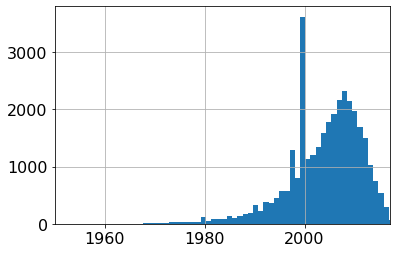

In [35]:
df_user.started.hist(bins = 2000)
plt.xlim((1950, 2017))
plt.ylim((0, 3800))

In [36]:
df_user.started.value_counts()

0       29119
2000     3621
2008     2319
2007     2163
2009     2138
        ...  
1914        1
1909        1
1942        1
1943        1
1919        1
Name: started, Length: 88, dtype: int64

In [37]:
df_user.birth

0        1976-03-10
1               NaN
2        1973-09-09
3        1984-07-26
4        1969-05-07
            ...    
62588    1991-01-05
62589    1989-05-18
62590    1986-07-10
62591           NaN
62592           NaN
Name: birth, Length: 62593, dtype: object

In [41]:


# from datetime import datetime, date
  
# # Creating a list of date of birth
# # dob = {'DOB': ['13/05/1986', '12/12/2018', '23/04/2006']}
  
# # Creating dataframe
# # df = pd.DataFrame(data = dob)
  
# # This function converts given date to age
# def age(born):
#     if born != None:
#         born = datetime.strptime(born, "%Y-%m-%d").date()
#         today = date.today()
#         return today.year - born.year - ((today.month, 
#                                           today.day) < (born.month, 
#                                                         born.day))
  
# df_user['Age'] = df_user['birth'].apply(age)
  


(0.0, 3500.0)

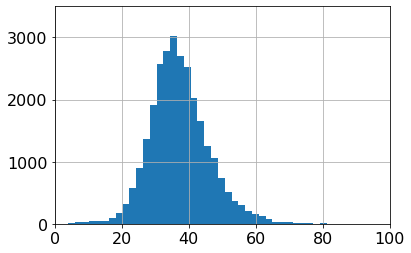

In [42]:
df_user.Age.hist(bins = 500)
plt.xlim((0, 100))
plt.ylim((0, 3500))


In [43]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62593 entries, 0 to 62592
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            62593 non-null  int64  
 1   first_name    62593 non-null  object 
 2   last_name     62593 non-null  object 
 3   city          61163 non-null  object 
 4   country       62495 non-null  object 
 5   sex           62593 non-null  int64  
 6   height        62593 non-null  int64  
 7   weight        62593 non-null  int64  
 8   started       62593 non-null  int64  
 9   competitions  4888 non-null   object 
 10  occupation    11778 non-null  object 
 11  sponsor1      5355 non-null   object 
 12  sponsor2      2656 non-null   object 
 13  sponsor3      1497 non-null   object 
 14  best_area     15413 non-null  object 
 15  worst_area    220 non-null    object 
 16  guide_area    7755 non-null   object 
 17  interests     8577 non-null   object 
 18  birth         27856 non-nu

In [51]:
from datetime import datetime, date
  
# Creating a list of date of birth
# dob = {'DOB': ['13/05/1986', '12/12/2018', '23/04/2006']}
  
# Creating dataframe
# df = pd.DataFrame(data = dob)
  
# This function converts given date to age
def years_climbing(started):
    if started != 0:
        started = str(started)
        started = datetime.strptime(started, "%Y").date()
        today = date.today()
        return today.year - started.year 
  
df_user['years_climbing'] = df_user['started'].apply(years_climbing)

(0.0, 5000.0)

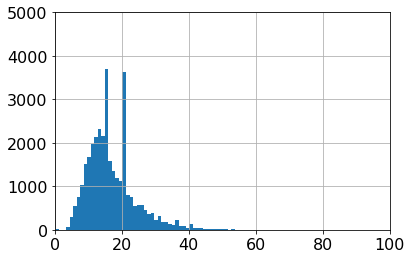

In [57]:
df_user.years_climbing.hist(bins = 180)
plt.xlim((0, 100))
plt.ylim((0, 5000))

In [69]:
df_ascent_processed.columns

Index(['id', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country', 'comment', 'rating', 'description', 'yellow_id', 'climb_try',
       'repeat', 'exclude_from_ranking', 'user_recommended', 'chipped', 'shoe',
       'video', 'screename'],
      dtype='object')

In [64]:
df_route_ascent_processed.climb_type.value_counts()



0.0    2875675
Name: climb_type, dtype: int64

In [63]:
df_route_ascent_processed.climb_type.value_counts()

0.0    2875675
Name: climb_type, dtype: int64

In [67]:
df_ascent_processed.columns

Index(['id', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country', 'comment', 'rating', 'description', 'yellow_id', 'climb_try',
       'repeat', 'exclude_from_ranking', 'user_recommended', 'chipped', 'shoe',
       'video', 'screename'],
      dtype='object')

In [74]:
df_spark_boulder = df_ascent_processed[['user_id', 'name','rating']]
df_spark_routes = df_route_ascent_processed[['user_id', 'name','rating']]



In [73]:
df_spark_boulder.to_csv('/Users/cp/Documents/dsi/8a_kaggle/dev_imac2/df_spark_boulder.csv', index = False)

In [75]:
df_spark_routes.to_csv('/Users/cp/Documents/dsi/8a_kaggle/dev_imac2/df_spark_routes.csv', index = False)

In [76]:
import function

ModuleNotFoundError: No module named 'function'